The almanac (your puzzle input) lists all of the seeds that need to be planted. It also lists what type of soil to use with each kind of seed, what type of fertilizer to use with each kind of soil, what type of water to use with each kind of fertilizer, and so on. Every type of seed, soil, fertilizer and so on is identified with a number, but numbers are reused by each category - that is, soil 123 and fertilizer 123 aren't necessarily related to each other.

```
seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4
```

The rest of the almanac contains a list of maps which describe how to convert numbers from a source category into numbers in a destination category. That is, the section that starts with seed-to-soil map: describes how to convert a seed number (the source) to a soil number (the destination). This lets the gardener and his team know which soil to use with which seeds, which water to use with which fertilizer, and so on.


**destination range start, the source range start, and the range length.**


Consider again the example seed-to-soil map:
```
50 98 2  
52 50 48  
```
The first line has a destination range start of 50, a source range start of 98, and a range length of 2. This line means that the source range starts at 98 and contains two values: 98 and 99. The destination range is the same length, but it starts at 50, so its two values are 50 and 51. With this information, you know that seed number 98 corresponds to soil number 50 and that seed number 99 corresponds to soil number 51.


**Any source numbers that aren't mapped correspond to the same destination number. So, seed number 10 corresponds to soil number 10.**

The gardener and his team want to get started as soon as possible, so they'd like to know the closest location that needs a seed. Using these maps, find the lowest location number that corresponds to any of the initial seeds. To do this, you'll need to convert each seed number through other categories until you can find its corresponding location number. In this example, the corresponding types are:

Seed 79, soil 81, fertilizer 81, water 81, light 74, temperature 78, humidity 78, location 82.
Seed 14, soil 14, fertilizer 53, water 49, light 42, temperature 42, humidity 43, location 43.
Seed 55, soil 57, fertilizer 57, water 53, light 46, temperature 82, humidity 82, location 86.
Seed 13, soil 13, fertilizer 52, water 41, light 34, temperature 34, humidity 35, location 35.
So, the lowest location number in this example is 35.

What is the lowest location number that corresponds to any of the initial seed numbers?

In [1]:
pwd

In [2]:
import re
import sys

In [3]:
with open('ex.txt') as f:
    for line in f.readlines():
        print(line)
        if 'seeds' in line:
            pass
        elif 'map' in line:
            pass
#             print(line)
#             print(re.findall("(\w*)-to-(\w*) map:", line)[0])
        elif line.strip() == "":
            pass
#             print("BLANK LINE!!")
        else:
            pass
#             print([int(x) for x in line.split()])
            

seeds: 79 14 55 13



seed-to-soil map:

50 98 2

52 50 48



soil-to-fertilizer map:

0 15 37

37 52 2

39 0 15



fertilizer-to-water map:

49 53 8

0 11 42

42 0 7

57 7 4



water-to-light map:

88 18 7

18 25 70



light-to-temperature map:

45 77 23

81 45 19

68 64 13



temperature-to-humidity map:

0 69 1

1 0 69



humidity-to-location map:

60 56 37

56 93 4


In [4]:
cur_map = {}
dest_start, source_start, size = 50, 98, 2
temp = dict(zip(range(dest_start, dest_start + size),
                 range(source_start, source_start+size)
            )
        )
cur_map = {**cur_map, **temp}
cur_map

{50: 98, 51: 99}

In [5]:
dest_start, source_start, size = 52, 50, 48
temp = dict(zip(range(dest_start, dest_start + size),
                 range(source_start, source_start+size)
            )
        )
cur_map = {**cur_map, **temp}
cur_map

{50: 98,
 51: 99,
 52: 50,
 53: 51,
 54: 52,
 55: 53,
 56: 54,
 57: 55,
 58: 56,
 59: 57,
 60: 58,
 61: 59,
 62: 60,
 63: 61,
 64: 62,
 65: 63,
 66: 64,
 67: 65,
 68: 66,
 69: 67,
 70: 68,
 71: 69,
 72: 70,
 73: 71,
 74: 72,
 75: 73,
 76: 74,
 77: 75,
 78: 76,
 79: 77,
 80: 78,
 81: 79,
 82: 80,
 83: 81,
 84: 82,
 85: 83,
 86: 84,
 87: 85,
 88: 86,
 89: 87,
 90: 88,
 91: 89,
 92: 90,
 93: 91,
 94: 92,
 95: 93,
 96: 94,
 97: 95,
 98: 96,
 99: 97}

## Parse Input

In [6]:
seeds = []
maps = {}
cur_map = None
linecount = 0

with open('ex.txt') as f:
    for line in f.readlines():
        linecount += 1
        padding = " " * (6-len(str(linecount)))
        sys.stdout.write(f"\rOn line: {linecount}{padding}")
        if linecount == 1:
            #Get the seeds
            seeds = [int(x) for x in line.strip("seeds: ").split()]
        elif line.strip() == "":
            #Blank Line
            continue
        elif "map" in line:
            #Save the previous map, if exists
            if cur_map:
                maps[source] = cur_map
            ranges = []
            source, destination = re.findall("(\w*)-to-(\w*) map:", line)[0]
            cur_map = {'destination':destination,
                       'ranges':ranges} #reset the current map
            
        else:
            #Add to the current map
            dest_start, source_start, size = [int(x) for x in line.split()]
            ranges.append((source_start, dest_start, size))
            #Don't do this: expensive!!
#             temp = dict(zip(range(dest_start, dest_start + size),
#                              range(source_start, source_start+size)
#                             )
#                         )
#             cur_map = {**cur_map, **temp} #Add entries to current mapping.
#Add the final mapping to location
maps[source] = cur_map

print(len(seeds), seeds)
print(maps.keys())


On line: 1     
On line: 2     
On line: 3     
On line: 4     
On line: 5     
On line: 6     
On line: 7     
On line: 8     
On line: 9     
On line: 10    
On line: 11    
On line: 12    
On line: 13    
On line: 14    
On line: 15    
On line: 16    
On line: 17    
On line: 18    
On line: 19    
On line: 20    
On line: 21    
On line: 22    
On line: 23    
On line: 24    
On line: 25    
On line: 26    
On line: 27    
On line: 28    
On line: 29    
On line: 30    
On line: 31    
On line: 32    
On line: 33    4 [79, 14, 55, 13]
dict_keys(['seed', 'soil', 'fertilizer', 'water', 'light', 'temperature', 'humidity'])


## Find the closest seed

In [7]:
cur_map

{'destination': 'location', 'ranges': [(56, 60, 37), (93, 56, 4)]}

In [8]:
cur_map['destination']

'location'

In [9]:
cur_map['ranges']

[(56, 60, 37), (93, 56, 4)]

In [49]:
def get_location(source, number, maps=maps, to_print=False):
    #keep going until you get a location....
    cur_map = maps[source]
    destination = cur_map['destination']
    destination_number = None
    for source_start, dest_start, size in cur_map['ranges']:
        if (number >= source_start) & (number <= source_start+size):
            offset = number - source_start
            destination_number = dest_start + offset
            break
    if to_print:
        if destination_number:
            print(f"{destination}: {destination_number}")
        else:
            print(f"{destination}: {number}")
    if destination == 'location':
        if destination_number:
            return destination_number
        else:
            return number
    else:
        if destination_number:
            return get_location(destination, destination_number, maps=maps, to_print=to_print)
        else:
            return get_location(destination, number, maps=maps, to_print=to_print)

In [50]:
maps

{'seed': {'destination': 'soil',
  'ranges': [(1281207339, 2211745924, 39747980),
   (2564129012, 3648083739, 145170114),
   (2333022880, 4171944574, 44675857),
   (848661020, 540694760, 78793182),
   (588160543, 256996824, 260500477),
   (1804847051, 1870557289, 174857657),
   (2853012070, 3877597859, 228980636),
   (2150723562, 1634159465, 100770342),
   (2293912908, 3793253853, 39109972),
   (567856215, 652571990, 20304328),
   (3372556760, 2480343183, 130573730),
   (528443121, 1831144195, 39413094),
   (1690920197, 0, 113926854),
   (3081992706, 3145720856, 290564054),
   (1979704708, 624623106, 27948884),
   (3751059243, 3844601856, 32996003),
   (1175075910, 1260492360, 106131429),
   (166330978, 1366623789, 138490835),
   (927454202, 1175000149, 85492211),
   (1596389312, 696570061, 94530885),
   (3784055246, 2647046837, 498674019),
   (2709299126, 4216620431, 78346865),
   (1450000160, 953230443, 146389152),
   (1012946413, 791100946, 162129497),
   (427093569, 1734929807, 962

In [51]:
cur_map = maps['seed']
cur_map

{'destination': 'soil',
 'ranges': [(1281207339, 2211745924, 39747980),
  (2564129012, 3648083739, 145170114),
  (2333022880, 4171944574, 44675857),
  (848661020, 540694760, 78793182),
  (588160543, 256996824, 260500477),
  (1804847051, 1870557289, 174857657),
  (2853012070, 3877597859, 228980636),
  (2150723562, 1634159465, 100770342),
  (2293912908, 3793253853, 39109972),
  (567856215, 652571990, 20304328),
  (3372556760, 2480343183, 130573730),
  (528443121, 1831144195, 39413094),
  (1690920197, 0, 113926854),
  (3081992706, 3145720856, 290564054),
  (1979704708, 624623106, 27948884),
  (3751059243, 3844601856, 32996003),
  (1175075910, 1260492360, 106131429),
  (166330978, 1366623789, 138490835),
  (927454202, 1175000149, 85492211),
  (1596389312, 696570061, 94530885),
  (3784055246, 2647046837, 498674019),
  (2709299126, 4216620431, 78346865),
  (1450000160, 953230443, 146389152),
  (1012946413, 791100946, 162129497),
  (427093569, 1734929807, 96214388),
  (403399826, 672876318, 2

In [13]:
cur_map['destination']

'soil'

In [14]:
get_location('seed',79)

82

In [15]:
seeds

[79, 14, 55, 13]

In [16]:
seedlocs = [] #[(seed1, loc1), (seed2, loc2),...(seedn,locn)]
for seed in seeds:
    print(f"Seed: {seed}")
    location = get_location('seed', seed, to_print=True)
    seedlocs.append((seed, location))
    print("\n")
seedlocs = sorted(seedlocs, key=lambda x: x[1])
print(seedlocs)
print(f"Closest seed: {seedlocs[0][0]} location: {seedlocs[0][1]}")

Seed: 79
soil: 81
fertilizer: 81
water: 81
light: 74
temperature: 78
humidity: 78
location: 82


Seed: 14
soil: 14
fertilizer: 53
water: 49
light: 42
temperature: 42
humidity: 43
location: 43


Seed: 55
soil: 57
fertilizer: 57
water: 53
light: 46
temperature: 82
humidity: 82
location: 86


Seed: 13
soil: 13
fertilizer: 52
water: 41
light: 34
temperature: 34
humidity: 35
location: 35


[(13, 35), (14, 43), (79, 82), (55, 86)]
Closest seed: 13 location: 35


## Final Run

In [17]:
seeds = []
maps = {}
cur_map = None
linecount = 0

with open('input.txt') as f:
    for line in f.readlines():
        linecount += 1
        padding = " " * (6-len(str(linecount)))
        #sys.stdout.write(f"\rOn line: {linecount}{padding}")
        if linecount == 1:
            #Get the seeds
            seeds = [int(x) for x in line.strip("seeds: ").split()]
        elif line.strip() == "":
            #Blank Line
            continue
        elif "map" in line:
            #Save the previous map, if exists
            if cur_map:
                maps[source] = cur_map
            ranges = []
            source, destination = re.findall("(\w*)-to-(\w*) map:", line)[0]
            cur_map = {'destination':destination,
                       'ranges':ranges} #reset the current map
            
        else:
            #Add to the current map
            dest_start, source_start, size = [int(x) for x in line.split()]
            ranges.append((source_start, dest_start, size))
            #Don't do this: expensive!!
#             temp = dict(zip(range(dest_start, dest_start + size),
#                              range(source_start, source_start+size)
#                             )
#                         )
#             cur_map = {**cur_map, **temp} #Add entries to current mapping.
#Add the final mapping to location
maps[source] = cur_map

print(len(seeds), 'Seeds: ', seeds, '\n')
print(maps.keys(), '\n')

seedlocs = [] #[(seed1, loc1), (seed2, loc2),...(seedn,locn)]
for seed in seeds:
    #print(f"Seed: {seed}")
    location = get_location('seed', seed, maps=maps, to_print=False)
    seedlocs.append((seed, location))
    #print("\n")
seedlocs = sorted(seedlocs, key=lambda x: x[1])
print(seedlocs, '\n\n')
print(f"Closest seed: {seedlocs[0][0]} location: {seedlocs[0][1]}")

20 Seeds:  [3082872446, 316680412, 2769223903, 74043323, 4131958457, 99539464, 109726392, 353536902, 619902767, 648714498, 3762874676, 148318192, 1545670780, 343889780, 4259893555, 6139816, 3980757676, 20172062, 2199623551, 196958359] 

dict_keys(['seed', 'soil', 'fertilizer', 'water', 'light', 'temperature', 'humidity']) 

[(316680412, 84470622), (3980757676, 136887475), (2769223903, 797022648), (2199623551, 970058274), (4259893555, 1061720983), (3082872446, 1085436433), (148318192, 1175734550), (6139816, 1611747764), (20172062, 1625780010), (648714498, 2450588295), (4131958457, 2473940599), (1545670780, 2761597611), (343889780, 2828186651), (353536902, 2837833773), (74043323, 3040934752), (99539464, 3066430893), (109726392, 3076617821), (3762874676, 3210752671), (619902767, 4058019656), (196958359, 4099273491)] 


Closest seed: 316680412 location: 84470622


## --- Part Two ---
Everyone will starve if you only plant such a small number of seeds. Re-reading the almanac, it looks like the seeds: line actually describes ranges of seed numbers.

The values on the initial seeds: line come in pairs. Within each pair, the first value is the start of the range and the second value is the length of the range. So, in the first line of the example above:

seeds: 79 14 55 13
This line describes two ranges of seed numbers to be planted in the garden. The first range starts with seed number 79 and contains 14 values: 79, 80, ..., 91, 92. The second range starts with seed number 55 and contains 13 values: 55, 56, ..., 66, 67.

Now, rather than considering four seed numbers, you need to consider a total of 27 seed numbers.

In the above example, the lowest location number can be obtained from seed number 82, which corresponds to soil 84, fertilizer 84, water 84, light 77, temperature 45, humidity 46, and location 46. So, the lowest location number is 46.

Consider all of the initial seed numbers listed in the ranges on the first line of the almanac. What is the lowest location number that corresponds to any of the initial seed numbers?



In [3]:
seeds = []
maps = {}
cur_map = None
linecount = 0

with open('input.txt') as f:
    for line in f.readlines():
        linecount += 1
        padding = " " * (6-len(str(linecount)))
        #sys.stdout.write(f"\rOn line: {linecount}{padding}")
        if linecount == 1:
            #Get the seeds
            seeds = [int(x) for x in line.strip("seeds: ").split()]
        elif line.strip() == "":
            #Blank Line
            continue
        elif "map" in line:
            #Save the previous map, if exists
            if cur_map:
                maps[source] = cur_map
            ranges = []
            source, destination = re.findall("(\w*)-to-(\w*) map:", line)[0]
            cur_map = {'destination':destination,
                       'ranges':ranges} #reset the current map
            
        else:
            #Add to the current map
            dest_start, source_start, size = [int(x) for x in line.split()]
            ranges.append((source_start, dest_start, size))
            #Don't do this: expensive!!
#             temp = dict(zip(range(dest_start, dest_start + size),
#                              range(source_start, source_start+size)
#                             )
#                         )
#             cur_map = {**cur_map, **temp} #Add entries to current mapping.
#Add the final mapping to location
maps[source] = cur_map

print(len(seeds), 'Seeds: ', seeds, '\n')
print(maps.keys(), '\n')

20 Seeds:  [3082872446, 316680412, 2769223903, 74043323, 4131958457, 99539464, 109726392, 353536902, 619902767, 648714498, 3762874676, 148318192, 1545670780, 343889780, 4259893555, 6139816, 3980757676, 20172062, 2199623551, 196958359] 

dict_keys(['seed', 'soil', 'fertilizer', 'water', 'light', 'temperature', 'humidity']) 



In [12]:

seedlocs = [] #[(seed1, loc1), (seed2, loc2),...(seedn,locn)]

for i in range(0, len(seeds), 2):
    sys.stdout.write(f"On iteration {int((i+2)/2)} of {int(len(seeds)/2)}\n")
    start = int(seeds[i])
    length = int(seeds[i+1])
    for n, seed in enumerate(range(start, length)):
        sys.stdout.write(f"\r On seed {n} of {length} in range {round(n/length,2):.%}")
        location = get_location('seed', seed, maps=maps, to_print=False)
        seedlocs.append((seed, location))
        #print("\n")
seedlocs = sorted(seedlocs, key=lambda x: x[1])
print(seedlocs, '\n\n')
print(f"Closest seed: {seedlocs[0][0]} location: {seedlocs[0][1]}")

On iteration 1 of 10
On iteration 2 of 10
On iteration 3 of 10
On iteration 4 of 10
 On seed 45460082 of 353536902 in range 13.000000%

KeyboardInterrupt: 

Still running after 2 hours:

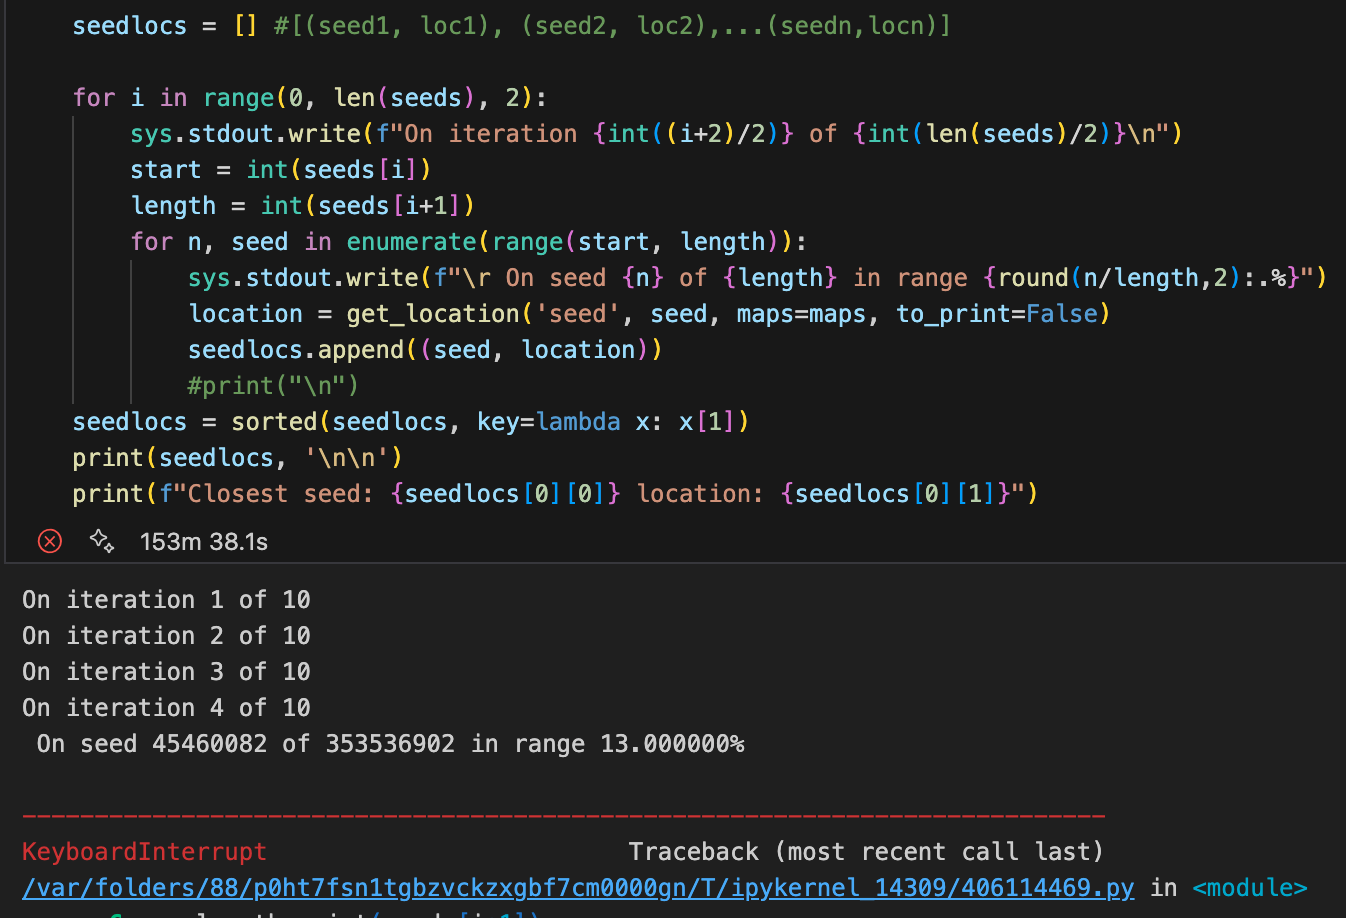

# P2 Optimized:

Work backwards through locations from lowest on....?
    > Have to also check that humidity does not have a lower value....
    think in terms of 'regions'

In [13]:
len(maps)

7

In [26]:
!pip install Tkinter

ERROR: Could not find a version that satisfies the requirement Tkinter (from versions: none)
ERROR: No matching distribution found for Tkinter


## Sankey

In [36]:
 def kmbt(number):
        abbreviations = ['', 'K', 'M', 'B', 'T']
        magnitude = 0
        while abs(number) >= 1000 and magnitude < len(abbreviations) - 1:
            number /= 1000
            magnitude += 1
        return f'{number:.1f}{abbreviations[magnitude]}'

# from Tkinter import Tk
# r = Tk()
# r.withdraw()
# r.clipboard_clear()
html_code = ""
edges = 0
for key, value in maps.items():
    ranges = [((source_start, source_start+length), (destination_start, destination_start+length)) for source_start, destination_start, length in value['ranges']]
    # print(key, value['destination'], [f"{kmbt(ss)}-{kmbt(se)} to {kmbt(ds)}-{kmbt(de)}" for (ss,se), (ds,de) in ranges])
    # SANKEY DIAGRAM FORMAT: [ 'Brazil', 'Portugal', 5 ]
    
    for (ss,se), (ds,de) in ranges:
        html_code += f"['{key}', '{value['destination']}', {se-ss}],\n"
        edges += 1
html_code = html_code.strip(",")
# print(edges)
# print(html_code)

heading = ""
footer = ""
with open('sankey_header.html') as f:
    for line in f.readlines():
        heading += line
with open('sankey_footer.html') as f:
    for line in f.readlines():
        footer += line
with open("Day5_Sankey.html", 'w') as f:
    full_code = heading + html_code + footer
    f.write(full_code)

In [43]:
import numpy as np

In [65]:
def get_location_p2(source, number, maps=maps, to_print=False, min_range_overhead = np.inf):
    #keep going until you get a location....
    cur_map = maps[source]
    destination = cur_map['destination']
    destination_number = None
    space_till_next_range_start = min_range_overhead
    for source_start, dest_start, size in cur_map['ranges']:
        if (number >= source_start) & (number <= source_start+size):
            offset = number - source_start
            destination_number = dest_start + offset
            overhead = size - offset
            if overhead < min_range_overhead:
                min_range_overhead = overhead
            break
        elif ((source_start - number) < space_till_next_range_start) and (number < source_start):
            space_till_next_range_start = source_start - number
    if to_print:
        if destination_number:
            print(f"{destination}: {destination_number}")
        else:
            print(f"{destination}: {number}")
    if destination == 'location':
        if destination_number:
            return (destination_number, min_range_overhead)
        else:
            return (number, space_till_next_range_start)
    else:
        if destination_number:
            return get_location_p2(destination, destination_number, maps=maps, to_print=to_print, min_range_overhead=min_range_overhead)
        else:
            return get_location_p2(destination, number, maps=maps, to_print=to_print, min_range_overhead=space_till_next_range_start)

In [66]:
def pad(x, width=10):
    x = str(x)
    padding = " " * (width-len(x))
    return f"{x}{padding}"

In [68]:

seedlocs = [] #[(seed1, loc1), (seed2, loc2),...(seedn,locn)]

for i in range(0, len(seeds), 2):
    sys.stdout.write(f"\nOn iteration {int((i+2)/2)} of {int(len(seeds)/2)}\n")
    start = int(seeds[i])
    length = int(seeds[i+1])
    seed = start
    while seed < (start + length):
        sys.stdout.write(f"\r On seed {seed} of {start+length} ({round((seed-start)/(length),2):.2%}) Last Jump size: {pad(jumpsize)}")
        location, room2grow = get_location_p2('seed', seed, maps=maps, to_print=False)
        seedlocs.append((seed, location))
        #Jump ahead room2grow
        jumpsize = max([1,room2grow])
        seed += jumpsize
        #print("\n")
seedlocs = sorted(seedlocs, key=lambda x: x[1])
print(seedlocs, '\n\n')
print(f"Closest seed: {seedlocs[0][0]} location: {seedlocs[0][1]}")


On iteration 1 of 10
 On seed 3388954187 of 3399552858 (97.00%) Last Jump size: 1         
On iteration 2 of 10
 On seed 2787645992 of 2843267226 (25.00%) Last Jump size: 1         
On iteration 3 of 10
 On seed 4206369710 of 4231497921 (75.00%) Last Jump size: 15053764  
On iteration 4 of 10
 On seed 427093569 of 463263294 (90.00%) Last Jump size: 23693743  
On iteration 5 of 10
 On seed 1265751594 of 1268617265 (100.00%) Last Jump size: 21385720  
On iteration 6 of 10
 On seed 3895608614 of 3911192868 (89.00%) Last Jump size: 1         
On iteration 7 of 10
 On seed 1881348390 of 1889560560 (98.00%) Last Jump size: 1         
On iteration 8 of 10
 On seed 4259893555 of 4266033371 (0.00%) Last Jump size: 12341037  
On iteration 9 of 10
 On seed 3991061563 of 4000929738 (51.00%) Last Jump size: 1         
On iteration 10 of 10
 On seed 2377698738 of 2396581910 (90.00%) Last Jump size: 1         [(802763513, 26714516), (304821814, 72612024), (848661020, 95809482), (856531608, 103680070

In [ ]:
# seedlocs = [] #[(seed1, loc1), (seed2, loc2),...(seedn,locn)]
# for seed in seeds:
#     #print(f"Seed: {seed}")
#     location = get_location('seed', seed, maps=maps, to_print=False)
#     seedlocs.append((seed, location))
#     #print("\n")
# seedlocs = sorted(seedlocs, key=lambda x: x[1])
# print(seedlocs, '\n\n')
# print(f"Closest seed: {seedlocs[0][0]} location: {seedlocs[0][1]}")